### 이버전은 jupyter notebook을 이용하여 작성했습니다

In [3]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

먼저 이미지를 불러옵니다.

In [9]:
img_path = './image/Lung_ROI_segmentation.png' 
img = cv2.imread(img_path)

In [11]:
img.shape

(279, 850, 3)

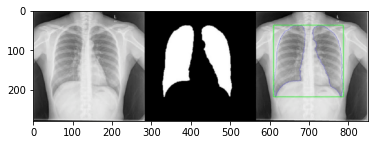

In [27]:
plt.imshow(img)

이미지를 그레이스케일하여 한채널로 바꿨습니다.

In [12]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [13]:
img_gray.shape

(279, 850)

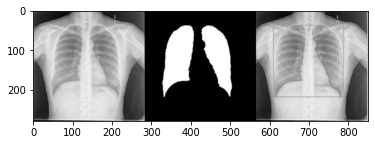

In [24]:
plt.imshow(img_gray, cmap='gray')

이미지를 3분할 하려고했는데 이미지의 shape가 279, 850이여서 850은 3으로 나누기가 어려워서 849까지하여 3분할을 했습니다. 혹시나 문제가 생길까봐 그림판으로 확인했는데 분할이 제대로 잘 된것 같아 그대로 진행했습니다.

In [17]:
img_hsplit= np.hsplit(img_gray[:,:849],3)
print(np.shape(img_hsplit))

(3, 279, 283)


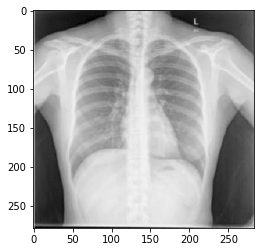

In [21]:
plt.imshow(img_hsplit[0], cmap='gray')

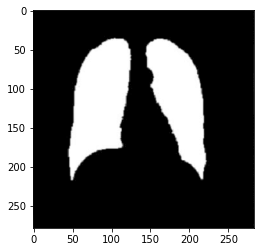

In [23]:
plt.imshow(img_hsplit[1], cmap='gray')

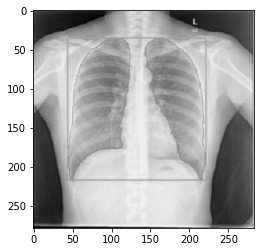

In [25]:
plt.imshow(img_hsplit[2], cmap='gray')

3개로 나눈 이미지를 bitwise_and연산자를 이용하여 구했습니다.

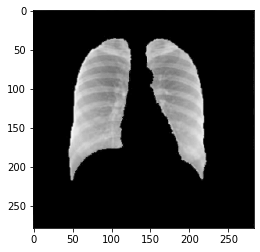

In [26]:
Lung_domain = cv2.bitwise_and(img_hsplit[0],img_hsplit[1])
plt.imshow(Lung_domain, cmap='gray')

실행은 시키지 않았지만 혹시라도 파일을 저장할 경우 사용할 imwrite코드 작성했습니다.

In [ ]:
cv2.imwrite("./image/masked_lung.png",Lung_domain)